<h1><center>Covid-19 Cases and Deaths analysis around the world</center></h1>
<h4><center>
<a style="text-decoration:none" href="https://github.com/CS328-Spring-2022/writing-assignment-chetan_shubh">Shubh Lavti</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:<sunil.sl@iitgn.ac.in">sunil.sl@iitgn.ac.in</a>
<br><br>
<a style="text-decoration:none" href="https://github.com/CS328-Spring-2022/writing-assignment-chetan_shubh">Chetan Kishore</a>, IIT Gandhinagar, <a style="text-decoration:none" href="mailto:chetan.k@iitgn.ac.in">chetan.k@iitgn.ac.in</a>

</center></h4>

<h1><centre>Introduction</centre></h1>

The 21st century saw its first worldwide pandemic in the form of Covid-19. The pandemic shook the entire world from its onset in December 2019. It caused millions of deaths across the globe. The effects of the pandemic are still visible in various parts of the world. With millions of cases and deaths, it becomes crucial to study the growth, spread, and decline patterns of cases. These studies also help in predicting the future of the covid waves. Hence, WHO has maintained data on Covid-19 spread in different regions of the world. With the help of data from WHO, we can also determine vaccination distribution status, fatality and recovery rates in different areas of the world.

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./data/WHO-COVID-19-global-table-data.csv")
df = df.drop(df[df.iloc[:,3]==0].index)
df


Name       WHO Region  Cases - cumulative total  \
0                         Global              abs                 493392853   
1       United States of America         Americas                  79501007   
2                          India  South-East Asia                  43031958   
3                         Brazil         Americas                  30040129   
4                         France           Europe                  25623682   
..                           ...              ...                       ...   
226  Falkland Islands (Malvinas)         Americas                       125   
227                     Holy See           Europe                        26   
228                         Niue  Western Pacific                         7   
229             Marshall Islands  Western Pacific                         4   
230                        Nauru  Western Pacific                         3   

     Cases - cumulative total per 100000 population  \
0                                       6329.980092   
1                                      24018.239000   
2                                       3118.248000   
3                                      14132.580000   
4                                      39397.193000   
..                                              ...   
226                                     3588.860000   
227                                     3213.844000   
228                                      432.633000   
229                                        6.757000   
230                                       27.691000   

     Cases - newly reported in last 7 days  \
0                                  7968332   
1                                   207355   
2                                     7518   
3                                   157732   
4                                   926709   
..                                     ...   
226                                      2   
227                                      0   
228                                      0   
229                                      0   
230                                      3   

     Cases - newly reported in last 7 days per 100000 population  \
0                                           102.229659             
1                                            62.645000             
2                                             0.545000             
3                                            74.206000             
4                                          1424.843000             
..                                                 ...             
226                                          57.422000             
227                                           0.000000             
228                                           0.000000             
229                                           0.000000             
230                                          27.691000             

     Cases - newly reported in last 24 hours  Deaths - cumulative total  \
0                                    1157995                    6165833   
1                                      35049                     975540   
2                                       1033                     521530   
3                                      27331                     660528   
4                                     161950                     139706   
..                                       ...                        ...   
226                                        0                          0   
227                                        0                          0   
228                                        0                          0   
229                                        0                          0   
230                                        1                          0   

     Deaths - cumulative total per 100000 population  \
0                                          79.104511   
1                                  

From the data provided, we understand that there were 231 countries which were affected by Covid-19. Few data's which we require for the study are of population in different regions, so that we can compare the spread based on populations in different regions. Also for some countries, data is not available as they do not come in the WHO region. The solution to this problem, is that we can assume that there were 0 cases in those countries, as these left out countries are small and do not contribute majorly to the spread of the pandemic.

In [3]:
Col = ["Cases - cumulative total per 100000 population","Cases - newly reported in last 7 days per 100000 population","Deaths - cumulative total per 100000 population","Deaths - newly reported in last 7 days per 100000 population"]
# required_columns = ["Name", "WHO Region","Cases - cumulative total", "Cases - newly reported in last 7 days", "Cases - newly reported in last 24 hours","Deaths - cumulative total","Deaths - newly reported in last 7 days", "Deaths - newly reported in last 24 hours"]
covid_df = df.drop(Col, axis=1)
# covid_df = covid_df.sort_values("Cases - cumulative total")


In [4]:
new_df = covid_df
uniqueValsList = list(set(df["WHO Region"]))


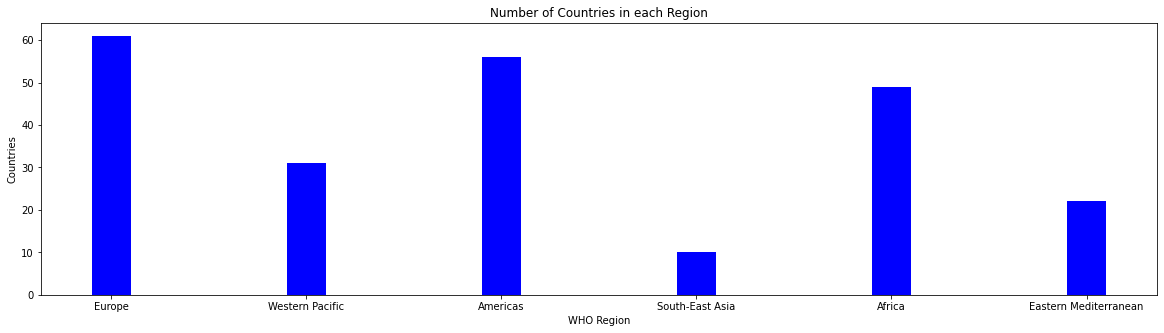

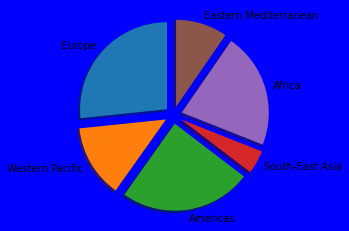

In [5]:
Continents = {}
for i in uniqueValsList:
    Continents[i] = []
for i in range(len(df)):
    Continents[df["WHO Region"][i]].append(df["Name"][i]) 
del Continents['abs']
del Continents['Other']
listconti = list(Continents.keys())
Countries = []

for i in Continents:
    Countries.append(len(Continents[i]))
Countries
fig = plt.figure(figsize = (20,5))
plt.bar(listconti,Countries,color='blue',width = 0.2)
plt.xlabel("WHO Region")
plt.ylabel("Countries")
plt.title("Number of Countries in each Region")

myexplode = [0.1,0.1,0.1,0.1,0.1,0.1]
plt.title("Number of Countries in each Region")
ax=plt.figure()
ax.set_facecolor('blue')
plt.pie(Countries,labels= listconti,startangle=90,explode = myexplode,shadow=True)
plt.show()


It is important to know about the number of countries in a region, so as to understand the reason behind the spread between neighbouring countries.

<h1><b>Cases per region</b></h1>

Total Cumulative cases

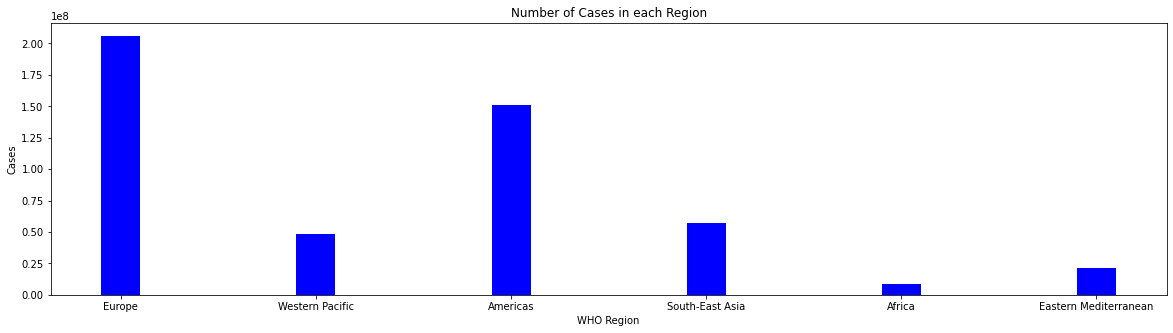

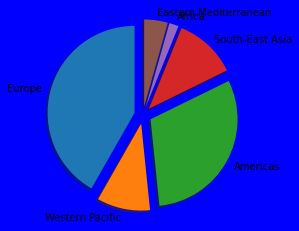

In [6]:
Cases_per_region = {}
for i in listconti:
    Cases_per_region[i]=0
for i in range(len(covid_df)):
    for j in range(len(listconti)):
        if df["WHO Region"][i] == listconti[j]:
            Cases_per_region[listconti[j]]+=covid_df["Cases - cumulative total"][i]
            break

x=list(Cases_per_region.keys())
y=list(Cases_per_region.values())


fig = plt.figure(figsize = (20,5))
plt.bar(x,y,color='blue',width = 0.2)
plt.xlabel("WHO Region")
plt.ylabel("Cases")
# plt.title("Number of Cases in each Region")
myexplode = [0.1,0.1,0.1,0.1,0.1,0.1]
plt.title("Number of Cases in each Region")
ax=plt.figure()
ax.set_facecolor('blue')
plt.pie(y,labels= x,startangle=90,explode = myexplode,shadow=True)
plt.show()

 From the above charts we can see that Covid's affect is completely based on regions and not on number of countries in a region (Africa has a lot of countries, but was least affected by Covid). There is no uniform spread of covid throughout the different regions. The most adverse effect of Covid was seen in the European region and the American region. A determining factor for this type of spread in the European region (even though it has comparatively less population) is because European countries are totally based on tourism and there is a lot of immigration factors. Hence, the spread being the highest. Also, we can say that Covid did not spread uniformly. It was based on environmental factors as well(African region not being affected much)

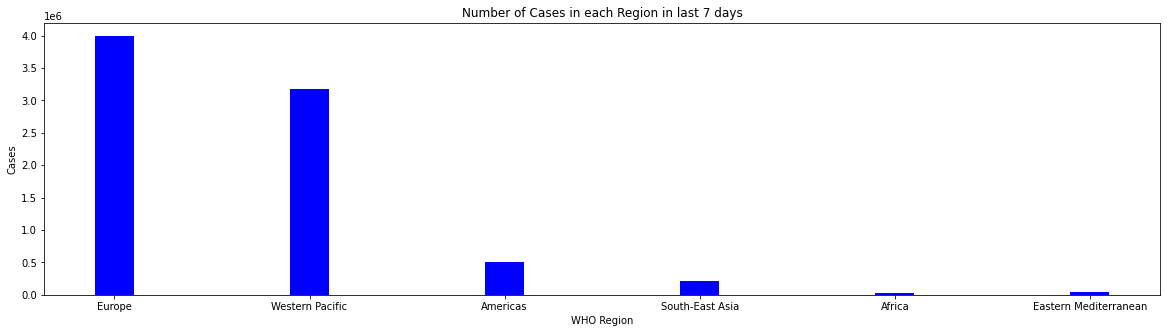

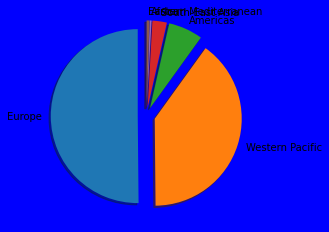

In [7]:
Cases_per_region_7 = {}
for i in listconti:
    Cases_per_region_7[i]=0
for i in range(len(covid_df)):
    for j in range(len(listconti)):
        if df["WHO Region"][i] == listconti[j]:
            Cases_per_region_7[listconti[j]]+=covid_df["Cases - newly reported in last 7 days"][i]
            break

x=list(Cases_per_region_7.keys())
y=list(Cases_per_region_7.values())


fig = plt.figure(figsize = (20,5))
plt.bar(x,y,color='blue',width = 0.2)
plt.xlabel("WHO Region")
plt.ylabel("Cases")
# plt.title("Number of Cases in each Region")
myexplode = [0.1,0.1,0.1,0.1,0.1,0.1]
plt.title("Number of Cases in each Region in last 7 days")
ax=plt.figure()
ax.set_facecolor('blue')
plt.pie(y,labels= x,startangle=90,explode = myexplode,shadow=True)

plt.show()

From the day of release of the data, we observe that Europe is seeing the highest increase in Covid cases in past 7 days. Again, this is credited to a lot of international movement in the European countries. Another factor which may seem to happen is about the knowledge of the cases. In many regions, Covid cases were not registered (in underdeveloped countries) and so in the developed countries, such as the European countries, most of the cases were registered and tended to.

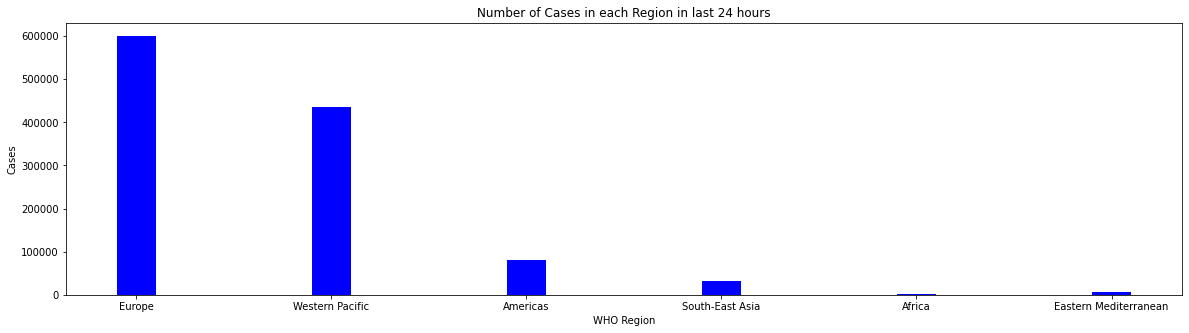

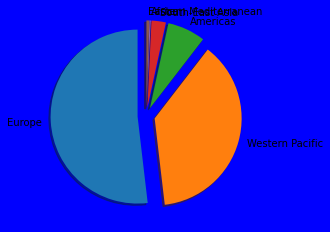

In [8]:
Case_per_region_24 = {}
for i in listconti:
    Case_per_region_24[i]=0
for i in range(len(covid_df)):
    for j in range(len(listconti)):
        if df["WHO Region"][i] == listconti[j]:
            Case_per_region_24[listconti[j]]+=covid_df["Cases - newly reported in last 24 hours"][i]
            break

x=list(Case_per_region_24.keys())
y=list(Case_per_region_24.values())


fig = plt.figure(figsize = (20,5))
plt.bar(x,y,color='blue',width = 0.2)
plt.xlabel("WHO Region")
plt.ylabel("Cases")
# plt.title("Number of Cases in each Region")
myexplode = [0.1,0.1,0.1,0.1,0.1,0.1]
plt.title("Number of Cases in each Region in last 24 hours")
ax=plt.figure()
ax.set_facecolor('blue')
plt.pie(y,labels= x,startangle=90,explode = myexplode,shadow=True)
plt.show()

This chart shows that the past 24 hours trend is almost similar to the 7 day trend. And it should be the case, as the trends of the past 24 hours also contribute to the past 7 days trend.

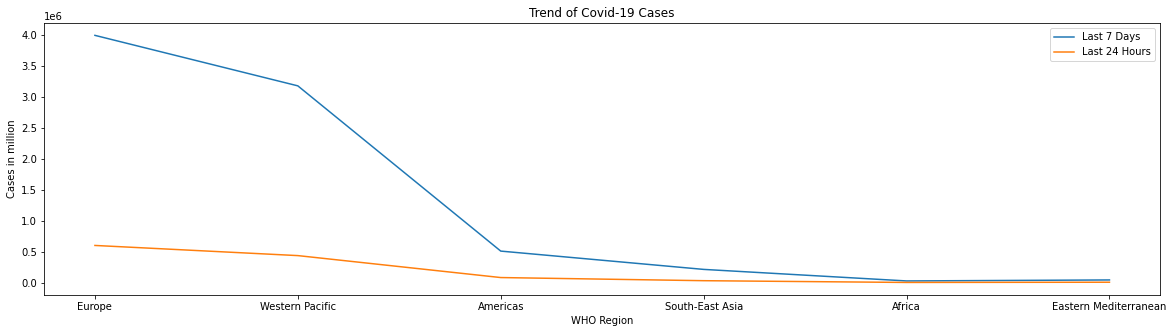

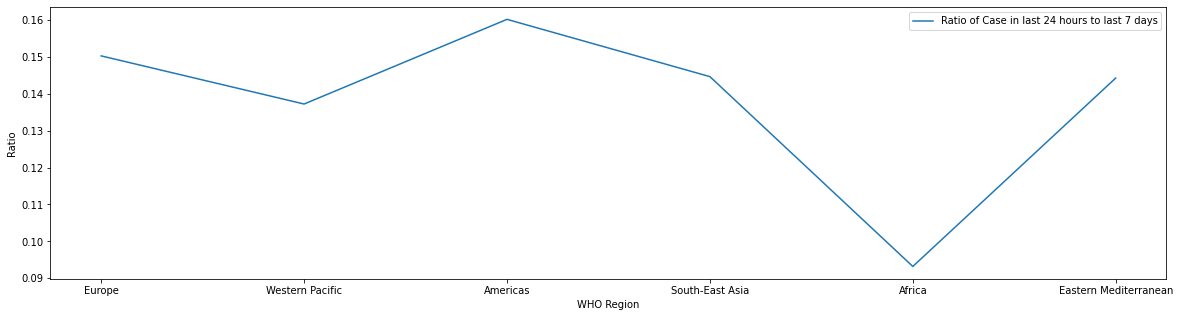

[0.15027388861779462,
 0.1372273576070679,
 0.16017252249332714,
 0.14464966780054914,
 0.09321024419297201,
 0.144270942744439]

In [9]:
T = {}
for i in Cases_per_region:
    T[i] = [Cases_per_region_7[i],Case_per_region_24[i]]

X = []
y1 = []
y2 = []
cnt = 0
for i in Case_per_region_24:
    
    X.append(cnt+2)
    y1.append(Cases_per_region_7[i])
    y2.append(Case_per_region_24[i])
    cnt+=2
labels = list(Case_per_region_24.keys())

fig = plt.figure(figsize=(20,5))
plt.ylabel("Cases in million")
plt.xlabel("WHO Region")
plt.title("Trend of Covid-19 Cases")
plt.plot(X,y1,label = "Last 7 Days")
plt.plot(X,y2,label = "Last 24 Hours")
plt.xticks(X,labels)
plt.legend()
plt.show()

y3 = []

for i in range(len(y1)):
    y3.append(y2[i]/y1[i])

fig = plt.figure(figsize=(20,5))
plt.plot(X,y3,label = "Ratio of Case in last 24 hours to last 7 days")
plt.xlabel("WHO Region")
plt.ylabel("Ratio")
plt.xticks(X,labels)
plt.legend()
plt.show()
y3

From this we can say that the rise in case in last 24 hours is very less in Africa while it has been extremely high for the American and European Countries. So we can predict that the number of cases will spike in the American and European countries for the near future.

Now let us move to the deaths due to Covid-19.

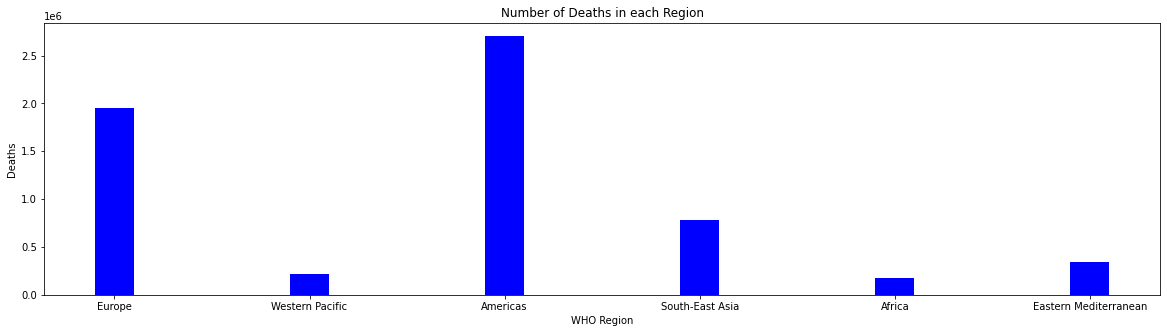

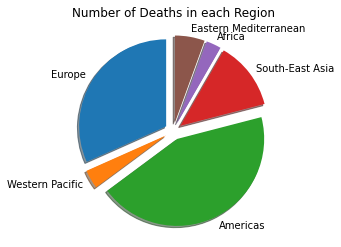

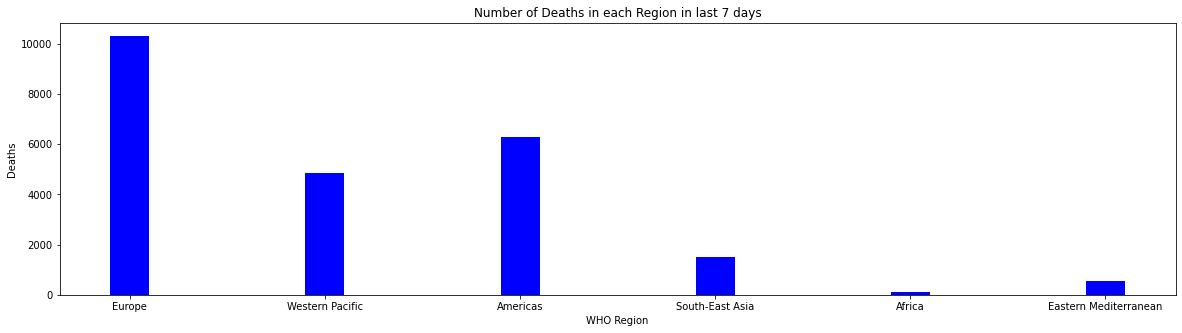

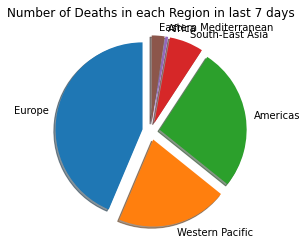

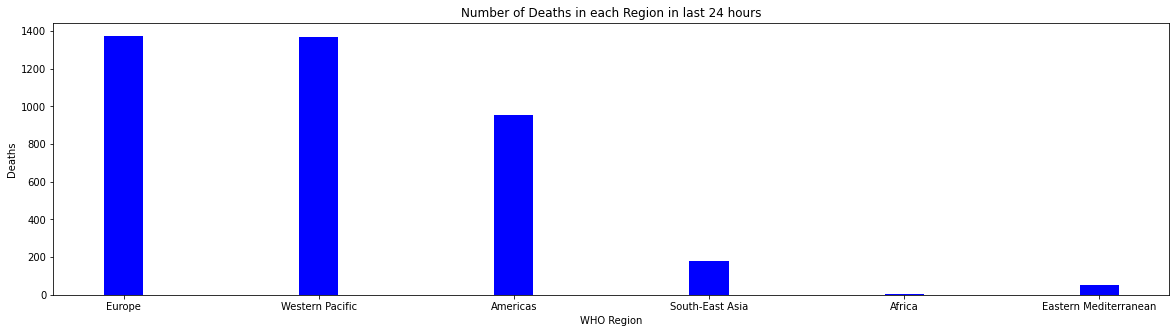

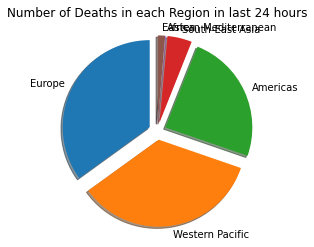

In [10]:
Deaths_perRegion = {}
Deaths_perRegion_7 = {}
Deaths_perRegion_24 = {}
for i in listconti:
    Deaths_perRegion[i]=0
    Deaths_perRegion_7[i]=0
    Deaths_perRegion_24[i]=0
for i in range(len(covid_df)):
    for j in range(len(listconti)):
        if df["WHO Region"][i] == listconti[j]:
            Deaths_perRegion[listconti[j]]+=covid_df["Deaths - cumulative total"][i]
            Deaths_perRegion_7[listconti[j]]+=covid_df["Deaths - newly reported in last 7 days"][i]
            Deaths_perRegion_24[listconti[j]]+=covid_df["Deaths - newly reported in last 24 hours"][i]
            break

x=list(Deaths_perRegion.keys())
y=list(Deaths_perRegion.values())


fig = plt.figure(figsize = (20,5))
plt.bar(x,y,color='blue',width = 0.2)
plt.xlabel("WHO Region")
plt.ylabel("Deaths")
plt.title("Number of Deaths in each Region")
plt.show()
myexplode = [0.1,0.1,0.1,0.1,0.1,0.1]
plt.title("Number of Deaths in each Region")
plt.pie(y,labels= x,startangle=90,explode = myexplode,shadow=True)
fig.set_facecolor('blue')
plt.show()


x=list(Deaths_perRegion_7.keys())
y=list(Deaths_perRegion_7.values())


fig = plt.figure(figsize = (20,5))
plt.bar(x,y,color='blue',width = 0.2)
plt.xlabel("WHO Region")
plt.ylabel("Deaths")
plt.title("Number of Deaths in each Region in last 7 days")
plt.show()
myexplode = [0.1,0.1,0.1,0.1,0.1,0.1]
plt.title("Number of Deaths in each Region in last 7 days")
plt.pie(y,labels= x,startangle=90,explode = myexplode,shadow=True)
fig.set_facecolor('blue')
plt.show()


x=list(Deaths_perRegion_24.keys())
y=list(Deaths_perRegion_24.values())


fig = plt.figure(figsize = (20,5))
plt.bar(x,y,color='blue',width = 0.2)
plt.xlabel("WHO Region")
plt.ylabel("Deaths")
plt.title("Number of Deaths in each Region in last 24 hours")
plt.show()
myexplode = [0.1,0.1,0.1,0.1,0.1,0.1]
plt.title("Number of Deaths in each Region in last 24 hours")
plt.pie(y,labels= x,startangle=90,explode = myexplode,shadow=True)
fig.set_facecolor('blue')
plt.show()

All over the world there have been millions of deaths, thus understanding the above three charts on death cases is of utmost importance.

The chart on overall death cases directly implies that even if the number of cases were way higher for European region, the number of death cases were comparatively lesser. We can infer from the chart that with the maximum spread of Covid in the European region. They have brought down the death tolls significantly with help of improved medical services. On similar grounds we can say that the other regions such as Africa and South East Asia, these regions are lacking in medical services.

The last two charts, refering to the death tolls in past 7 days and past 24 hours implies that all over the world, countries were trying to control the number of death tolls. The Western Pacific region could not control the death tolls, as we can infer from the charts.

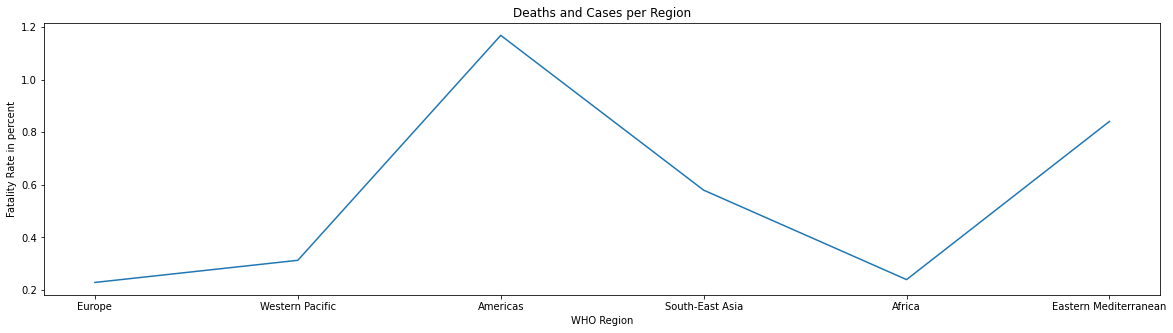

In [11]:
x = []
y1 = []
y2 = []
y3 = []
cnt = 0
for i in listconti:
    x.append(cnt+2)
    y1.append(Case_per_region_24[i])
    y2.append(Deaths_perRegion_24[i])
    a = 100*Deaths_perRegion_24[i]/Case_per_region_24[i]
    y3.append(a)
    cnt+=2

fig = plt.figure(figsize = (20,5))
plt.plot(x,y3)
plt.xlabel("WHO Region")
plt.ylabel("Fatality Rate in percent")
plt.title("Deaths and Cases per Region")
plt.xticks(x,labels)
plt.show()


The above graph directly relates to the medical services and vaccination status of diffierent regions across the globe. Countries in American region as well as in Eastern Mediterranean region have suffered a lot. It may be that the disease's effect may be critical in these regions, whereas it had very less impact in Africa.

In [12]:
covid_df = covid_df.sort_values("Cases - cumulative total")
top_five = covid_df[len(covid_df)-6:len(covid_df)-1]
top_five = top_five.sort_values("Cases - cumulative total")
top_five

Name       WHO Region  Cases - cumulative total  \
5                   Germany           Europe                  22265788   
4                    France           Europe                  25623682   
3                    Brazil         Americas                  30040129   
2                     India  South-East Asia                  43031958   
1  United States of America         Americas                  79501007   

   Cases - newly reported in last 7 days  \
5                                1161279   
4                                 926709   
3                                 157732   
2                                   7518   
1                                 207355   

   Cases - newly reported in last 24 hours  Deaths - cumulative total  \
5                                   201729                     131036   
4                                   161950                     139706   
3                                    27331                     660528   
2                                     1033                     521530   
1                                    35049                     975540   

   Deaths - newly reported in last 7 days  \
5                                    1645   
4                                     755   
3                                    1287   
2                                     401   
1                                    3657   

   Deaths - newly reported in last 24 hours  
5                                       328  
4                                       128  
3                                       216  
2                                        43  
1                                       610

In [13]:
top_five_country = list(top_five["Name"])
top_five_country

['Germany', 'France', 'Brazil', 'India', 'United States of America']

Although Europe has very high number of cases in Recent times but the fatality rate is still pretty less as compared to other WHO Regions. The Fatality rate is highest in American Continent. Thus the distribution of vaccine can be proposed on the basis of this rates. 

In [14]:
date_df = pd.read_csv("./data/WHO-COVID-19-global-data.csv")
date_df

Date_reported Country_code      Country WHO_region  New_cases  \
0         2020-01-03           AF  Afghanistan       EMRO          0   
1         2020-01-04           AF  Afghanistan       EMRO          0   
2         2020-01-05           AF  Afghanistan       EMRO          0   
3         2020-01-06           AF  Afghanistan       EMRO          0   
4         2020-01-07           AF  Afghanistan       EMRO          0   
...              ...          ...          ...        ...        ...   
195757    2022-04-03           ZW     Zimbabwe       AFRO        195   
195758    2022-04-04           ZW     Zimbabwe       AFRO         44   
195759    2022-04-05           ZW     Zimbabwe       AFRO         87   
195760    2022-04-06           ZW     Zimbabwe       AFRO        132   
195761    2022-04-07           ZW     Zimbabwe       AFRO         59   

        Cumulative_cases  New_deaths  Cumulative_deaths  
0                      0           0                  0  
1                      0           0                  0  
2                      0           0                  0  
3                      0           0                  0  
4                      0           0                  0  
...                  ...         ...                ...  
195757            246481           2               5446  
195758            246525           0               5446  
195759            246612           5               5451  
195760            246744           0               5451  
195761            246803           2               5453  

[195762 rows x 8 columns]

In [15]:
Country = {}
dates = []
for i in range(len(date_df)):
    if date_df["Country"][i] in Country:
        Country[date_df["Country"][i]].append(date_df["New_cases"][i])
    else:
        Country[date_df["Country"][i]] = [date_df["New_cases"][i]]

    if date_df["Date_reported"][i] not in dates:
        dates.append(date_df["Date_reported"][i])
# len(dates)
# Country


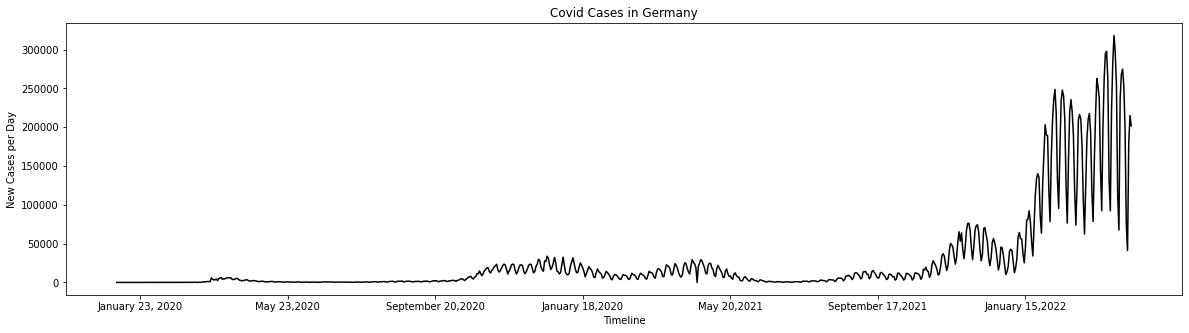

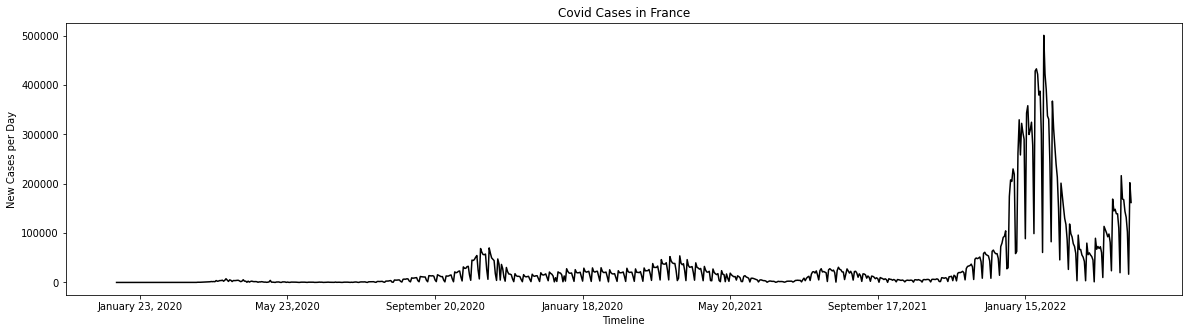

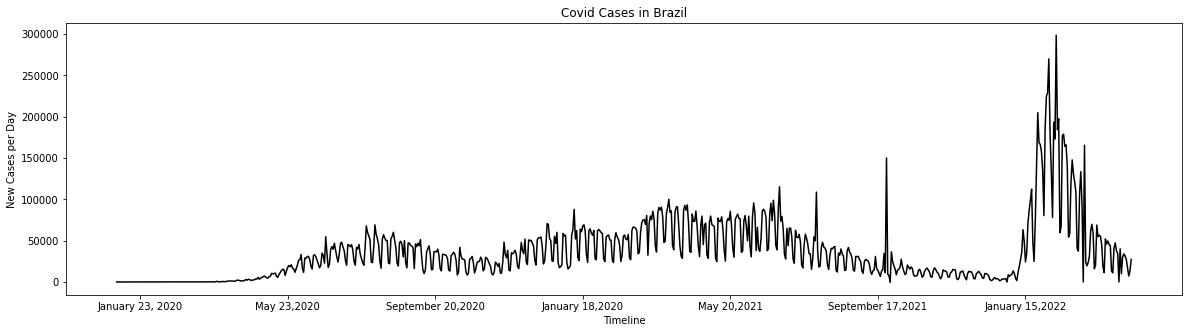

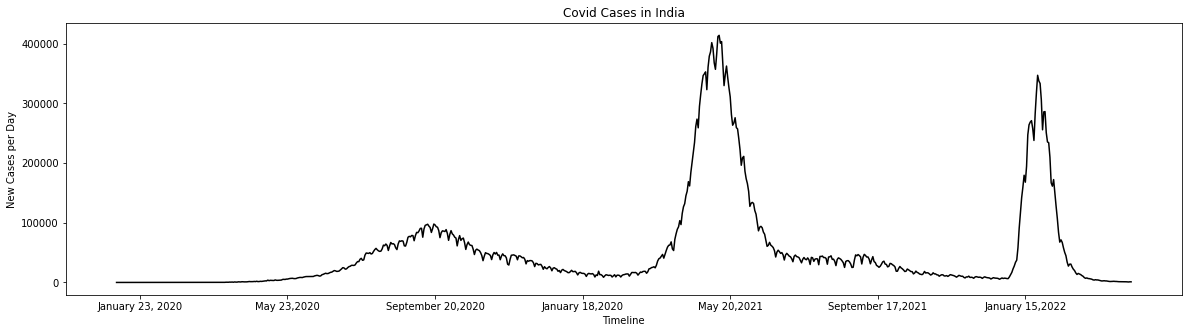

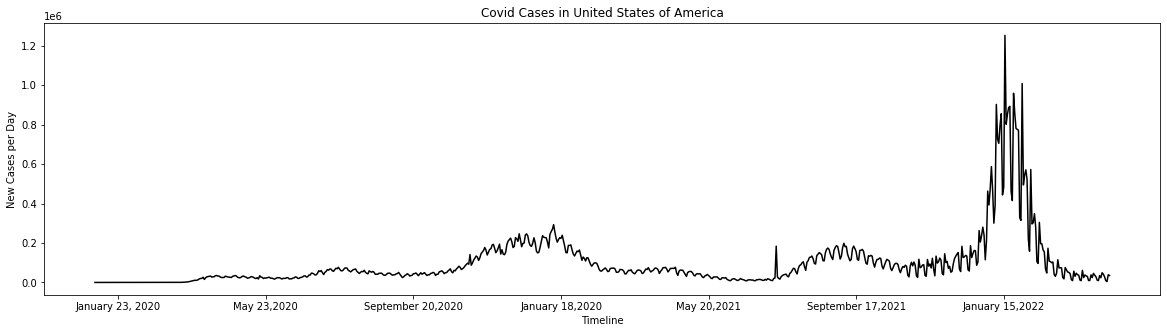

In [16]:

Months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

for l in top_five_country:
    DATE = []
    x=[]
    cnt = 0
    y=[]
    for i in range(len(dates)//30):
        DATE.append(Months[int(i%12)])
        y.append(0)
    for i in range(len(list(Country[l]))):
        x.append(cnt+1)
        cnt+=1


    fig = plt.figure(figsize = (20,5))
    plt.plot(x,list(Country[l]),color="black")
    xd = []
    flag = 20
    for i in range(7):
        xd.append(flag)
        flag+=120

    DATE = ["January 23, 2020","May 23,2020","September 20,2020","January 18,2020","May 20,2021","September 17,2021","January 15,2022"]
    plt.xticks(xd,DATE)
    plt.title("Covid Cases in "+str(l))
    plt.xlabel("Timeline")
    plt.ylabel("New Cases per Day")
    plt.show()



The graphs of New cases per day shows very rough trend because there is no uniformity in number of cases per day. Everyday, the cases are different and even though it depends on previous days' trends, the data collected is when people go out for their checkups and find out the results. Hence we can expect a rough graph. (Mostly for countries with less population)  

In Germany, there was no peak for a long time, but we observe that by the start of 2022, the cases started to rise quickly.

Similar is the case for France.

Brazil has seen a very rough trend throughout.

In India, we can clearly see that there have been three covid spikes, where the 2nd one was the longest one and with maximum cases. Also, here the daily trends are not jacked, because of the large population. 

In USA also, there are three clear spikes and that too on a similar timeline as of India. Here, the last spike is the longest. 

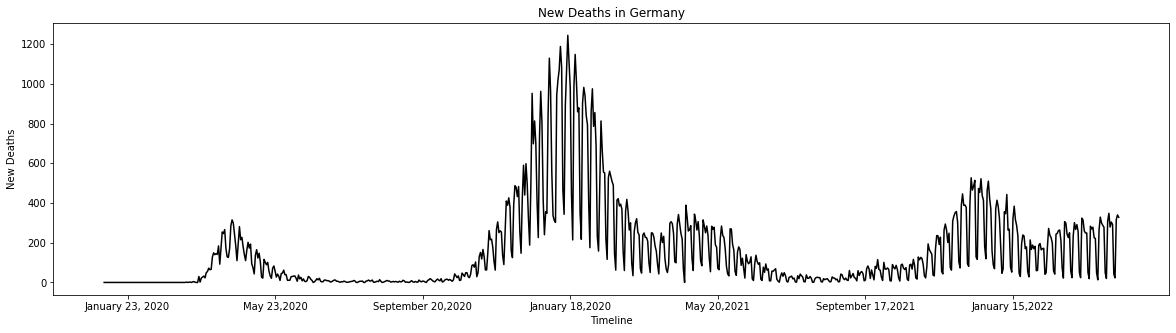

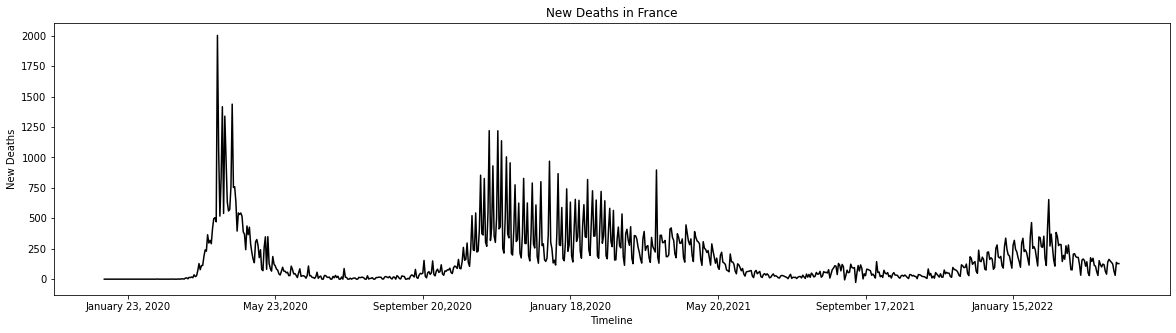

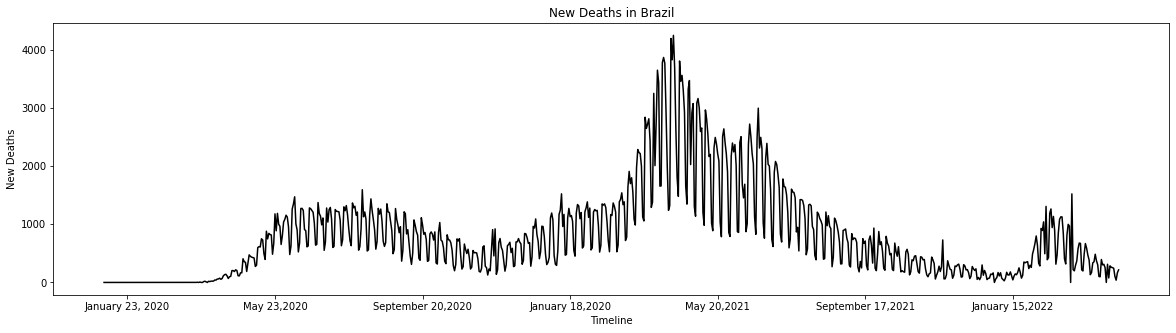

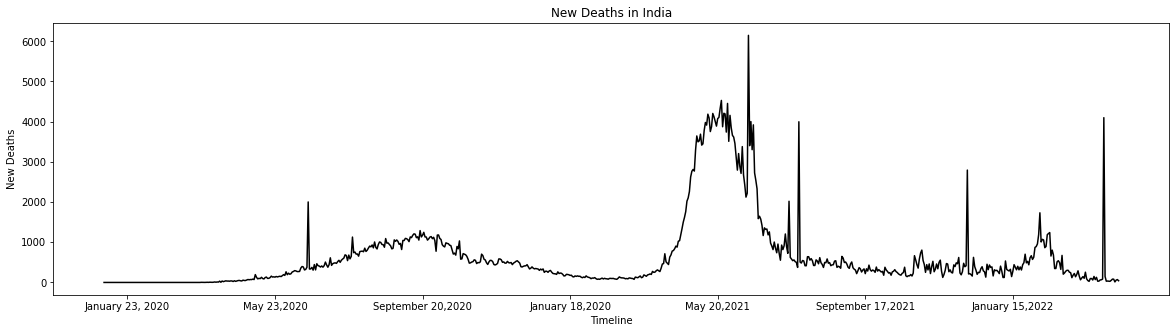

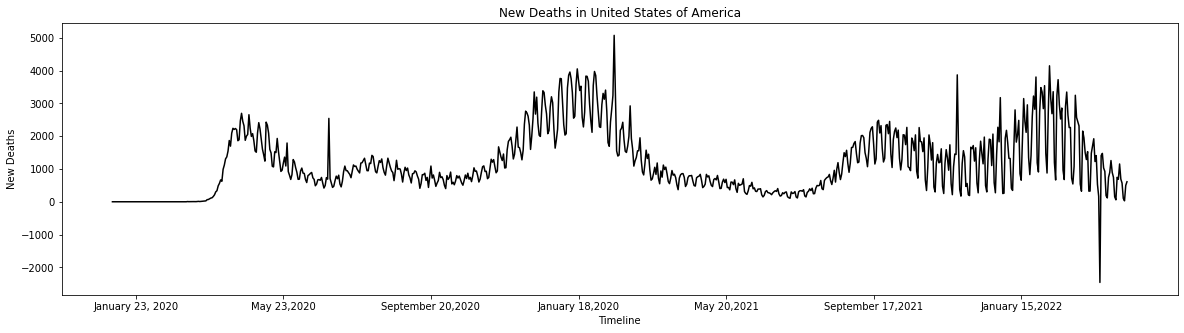

In [17]:

Country_d = {}
dates = []
for i in range(len(date_df)):
    if date_df["Country"][i] in Country_d:
        Country_d[date_df["Country"][i]].append(date_df["New_deaths"][i])
    else:
        Country_d[date_df["Country"][i]] = [date_df["New_deaths"][i]]

    if date_df["Date_reported"][i] not in dates:
        dates.append(date_df["Date_reported"][i])
len(dates)
Months = ["January","February","March","April","May","June","July","August","September","October","November","December"]

for l in top_five_country:
    DATE = []
    x=[]
    cnt = 0
    y=[]
    for i in range(len(dates)//30):
        DATE.append(Months[int(i%12)])
        y.append(0)
    for i in range(len(list(Country_d[l]))):
        x.append(cnt+1)
        cnt+=1


    fig = plt.figure(figsize = (20,5))
    plt.plot(x,list(Country_d[l]),color="black")
    xd = []
    flag = 20
    for i in range(7):
        xd.append(flag)
        flag+=120

    DATE = ["January 23, 2020","May 23,2020","September 20,2020","January 18,2020","May 20,2021","September 17,2021","January 15,2022"]
    plt.xticks(xd,DATE)
    plt.title("New Deaths in "+str(l))
    plt.xlabel("Timeline")
    plt.ylabel("New Deaths")
    plt.show()



As we can see from the above graphs that the peak in covid-19 cases and deaths are distinct for all the five countries. In India we can observe three waves (September 2020, May 2021, January 2022) in which the most devastating wave was the second wave. 

We also observe that between September 2020 to May 2021, there have been maximum deaths throughout the world. 

<h2>Try out </h2>


In [18]:
covid_df = pd.read_csv("./data/owid-covid-data.csv")
covid_df.sample(5)

iso_code      continent                         location        date  \
38133       HRV         Europe                          Croatia  2021-02-20   
148388      KOR           Asia                      South Korea  2020-09-29   
20574       BES  North America  Bonaire Sint Eustatius and Saba  2021-11-01   
34079       COL  South America                         Colombia  2021-03-10   
37273       CIV         Africa                    Cote d'Ivoire  2020-11-24   

        total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
38133      239685.0      431.0             318.000        5420.0        13.0   
148388      23812.0      113.0              85.143         413.0         6.0   
20574        2444.0        9.0               7.714          19.0         0.0   
34079     2285960.0     3588.0            3330.571       60773.0        97.0   
37273       21156.0        8.0              21.714         131.0         0.0   

        new_deaths_smoothed  ...  female_smokers  male_smokers  \
38133                17.286  ...            34.3          39.9   
148388                3.571  ...             6.2          40.9   
20574                 0.000  ...             NaN           NaN   
34079                98.714  ...             4.7          13.5   
37273                 0.286  ...             NaN           NaN   

        handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
38133                      NaN                        5.54            78.49   
148388                     NaN                       12.27            83.03   
20574                      NaN                         NaN            77.79   
34079                   65.386                        1.71            77.29   
37273                   19.351                         NaN            57.78   

        human_development_index  excess_mortality_cumulative_absolute  \
38133                     0.851                                   NaN   
148388                    0.916                                   NaN   
20574                       NaN                                   NaN   
34079                     0.767                                   NaN   
37273                     0.538                                   NaN   

        excess_mortality_cumulative  excess_mortality  \
38133                           NaN               NaN   
148388                          NaN               NaN   
20574                           NaN               NaN   
34079                           NaN               NaN   
37273                           NaN               NaN   

        excess_mortality_cumulative_per_million  
38133                                       NaN  
148388                                      NaN  
20574                                       NaN  
34079                                       NaN  
37273                                       NaN  

[5 rows x 67 columns]

In [19]:
required_columns = ["iso_code", "location", "continent", "date", "new_cases_smoothed", "total_cases"]
covid_df = covid_df.dropna(subset = required_columns)

covid_df = covid_df.sort_values("date")

In [117]:
covid_day_df = covid_df[covid_df.date == "2021-01-31"]



In [121]:

fig = px.scatter_geo(covid_day_df, locations="iso_code", color="continent",
                     hover_name="location", size="total_cases",
                     projection="natural earth",title="Total Number of Cases spread across all Continents")

fig.show()

In [126]:
covid_day_df["total_deaths"]=covid_day_df["total_deaths"].fillna(0)



In [124]:
fig = px.scatter_geo(covid_day_df, locations="iso_code", color="continent",
                     hover_name="location", size="total_deaths",
                     projection="natural earth",title="total deaths throughout all continents")

fig.show()

It is an obvious observation that wherever there were huge cases, the deaths have been maximum in those regions. India, USA, France and Brazil are among the most affected countries. The European region has been most affected by covid.